# Cyber Attack ML classification 

In [463]:
# importing things 
import pandas as pd
import numpy as np
import glob
import os
from sklearn import preprocessing 
from sklearn.preprocessing import OneHotEncoder as ohe
le = preprocessing.LabelEncoder()
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier
import tensorflow as tf
from tensorflow import keras
import random 

In [464]:
#set random seed
random.seed(1234567)

In [549]:
# import all the CIC csvs for HTTP
path = "/Users/belleho/Desktop/Dataset_CIC/HTTP_CIC" # use your path
HTTP_files = glob.glob(os.path.join(path, "*.csv"))
http = pd.concat((pd.read_csv(f) for f in HTTP_files))
http["Label"] = 0 

#import TCP 
path1 = "/Users/belleho/Desktop/Dataset_CIC/TCP_CIC"
TCP_files = glob.glob(os.path.join(path1, "*.csv"))
tcp = pd.concat((pd.read_csv(f) for f in TCP_files))
tcp["Label"] = 1

#import UDP 
path2 = "/Users/belleho/Desktop/Dataset_CIC/UDP_CIC"
UDP_files = glob.glob(os.path.join(path2, "*.csv"))
udp = pd.concat((pd.read_csv(f) for f in UDP_files))
udp["Label"] = 2


## Pre-processing data 
This section is where we clean the data in preparation for the machine learning process. To prepare the data - I have done the following things. 
- multiply dataset to reduce bias 
- split to train test data 
- drop columns that cannot be encoded, such as Timestamp and the IDS
- deal with infs, nas, nans
- encode Label to one hoe encoding 
- turn all the variables into float

In [550]:
# tcp = tcp*3

# tcp = pd.concat([tcp]*3)
tcp = pd.concat([tcp]*8, ignore_index = True)
udp = pd.concat([udp]*10, ignore_index = True)
frame = pd.concat([http, tcp, udp])


In [551]:
count_0 = 0 
count_1 = 0 
count_2 = 0 

for i in frame["Label"]:
    if i == 0:
        count_0+=1
    if i == 1:
        count_1+=1
    if i == 2:
        count_2+=1

print(" http:" + str(count_0) + " tcp:"+ str(count_1) + " udp:" + str(count_2))

 http:318289 tcp:356984 udp:81600


In [552]:
train, test = train_test_split(frame, test_size = 0.2)

In [553]:
# train = train.dropna()
train = train.drop(columns = ["Timestamp"])
train.replace([np.inf, -np.inf], np.nan, inplace = True)
train.dropna(inplace=True)
train_labels = tf.keras.utils.to_categorical(train["Label"])
train = train[train.columns[5:86]]
train = train.astype('int64')
train = train.astype('float64')

In [554]:
train

,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
79152,17.0,31266489.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,3.0,3.0,15574034.0,1775215.0,16829301.0,14318767.0,2.0
7300,6.0,2352148.0,2.0,5.0,17.0,384.0,17.0,0.0,8.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31799,6.0,24657055.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,66369.0,0.0,66369.0,66369.0,24500567.0,0.0,24500567.0,24500567.0,0.0
209733,6.0,1449113.0,9.0,5.0,10252.0,763.0,1460.0,0.0,1139.0,636.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
957,17.0,58434571.0,3546.0,1.0,113472.0,32.0,32.0,32.0,32.0,0.0,...,0.0,1756697.0,1498692.0,3222139.0,226832.0,17703005.0,8653348.0,27392890.0,10746183.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29515,6.0,231897.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1425,17.0,57773147.0,40.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3627.0,5126.0,7252.0,2.0,28882412.0,369813.0,29143910.0,28620915.0,2.0
153,6.0,1022925.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198858,6.0,22784877.0,110.0,60.0,121132.0,315.0,1398.0,0.0,1101.0,409.0,...,0.0,13563564.0,0.0,13563564.0,13563564.0,5278786.0,0.0,5278786.0,5278786.0,1.0


In [555]:

test = test.drop(columns = ["Timestamp"])
test.replace([np.inf, -np.inf], np.nan, inplace = True)
# test = test.dropna()
test.dropna(inplace=True)
test_labels = tf.keras.utils.to_categorical(test["Label"])
test = test[test.columns[5:87]]
test = test.astype('int64')
test = test.astype('float64') 

# Finding inf, nas, and null values 
for colname in clean_train.columns:
    c = np.isinf(clean_train[colname]).values.sum()
    print(str(colname) + " contains " + str(c) + " infinite values")

- Flow Byts/s contains 6 infinite values
- Flow Pkts/s contains 22 infinite values

for colname in clean_train.columns:
    c = np.isnan(clean_train[colname]).values.sum()
    print(str(colname) + " contains " + str(c) + " NA values")

- Flow Byts/s contains 16 NA values

for colname in clean_train.columns:
    c = clean_train[colname].isnull().sum()
    print(str(colname) + " contains " + str(c) + " null values")

- Flow Byts/s contains 16 null values


### neural network building

In [558]:
X_train_dnn = train.iloc[: ,0:77]
# X_train_dnn = train[relevant_l]
y_train_dnn = train_labels
X_train_dnn = X_train_dnn.to_numpy()

X_test_dnn = test.iloc[:,0:77]
# X_test_dnn = test[relevant_l] 
y_test_dnn = test_labels
X_test_dnn = X_test_dnn.to_numpy()

In [559]:
# from keras.layers.normalization import BatchNormalization

#model.add(BatchNormalization())

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(65, input_shape = (77,), activation = "relu", name = "input"))
model.add(tf.keras.layers.Dense(200, activation = "relu", name = "h2"))
model.add(tf.keras.layers.Dense(150, activation = "relu", name = "h3"))
model.add(tf.keras.layers.Dense(100, activation = "relu", name = "h4"))
model.add(tf.keras.layers.Dense(100, activation = "relu", name = "h5"))
model.add(tf.keras.layers.Dense(200, activation = "relu", name = "h6"))
model.add(tf.keras.layers.Dense(150, activation = "relu", name = "h7"))
model.add(tf.keras.layers.Dense(100, activation = "relu", name = "h8"))
model.add(tf.keras.layers.Dense(100, activation = "relu", name = "h9"))
model.add(tf.keras.layers.Dense(200, activation = "relu", name = "h10"))
model.add(tf.keras.layers.Dense(150, activation = "relu", name = "h11"))
model.add(tf.keras.layers.Dense(100, activation = "relu", name = "h12"))
model.add(tf.keras.layers.Dense(150, activation = "relu", name = "h13"))
model.add(tf.keras.layers.Dense(100, activation = "relu", name = "h14"))
model.add(tf.keras.layers.Dense(100, activation = "relu", name = "h15"))
# model.add(tf.keras.layers.Dense(200, activation = "relu", name = "h16"))
# model.add(tf.keras.layers.Dense(150, activation = "relu", name = "h17"))
# model.add(tf.keras.layers.Dense(100, activation = "relu", name = "h18"))
# model.add(tf.keras.layers.Dense(100, activation = "relu", name = "h19"))
# model.add(tf.keras.layers.Dense(200, activation = "relu", name = "h20"))
# model.add(tf.keras.layers.Dense(150, activation = "relu", name = "h21"))
# model.add(tf.keras.layers.Dense(100, activation = "relu", name = "h22"))
# model.add(tf.keras.layers.Dense(200, activation = "relu", name = "h23"))
# model.add(tf.keras.layers.Dense(100, activation = "relu", name = "h24"))
# model.add(tf.keras.layers.Dense(100, activation = "relu", name = "h25"))
# model.add(tf.keras.layers.Dense(200, activation = "relu", name = "h26"))
# model.add(tf.keras.layers.Dense(150, activation = "relu", name = "h27"))
# model.add(tf.keras.layers.Dense(100, activation = "relu", name = "h28"))
# model.add(tf.keras.layers.Dense(100, activation = "relu", name = "h29"))
# model.add(tf.keras.layers.Dense(200, activation = "relu", name = "h30"))
# model.add(tf.keras.layers.Dense(150, activation = "relu", name = "h31"))
# model.add(tf.keras.layers.Dense(100, activation = "relu", name = "h32"))
# model.add(tf.keras.layers.Dense(150, activation = "relu", name = "h33"))
# model.add(tf.keras.layers.Dense(100, activation = "relu", name = "h34"))
# model.add(tf.keras.layers.Dense(100, activation = "relu", name = "h35"))
# model.add(tf.keras.layers.Dense(200, activation = "relu", name = "h36"))
# model.add(tf.keras.layers.Dense(150, activation = "relu", name = "h37"))
# model.add(tf.keras.layers.Dense(100, activation = "relu", name = "h38"))
# model.add(tf.keras.layers.Dense(100, activation = "relu", name = "h39"))
# model.add(tf.keras.layers.Dense(200, activation = "relu", name = "h40"))
# model.add(tf.keras.layers.Dense(150, activation = "relu", name = "h41"))
# model.add(tf.keras.layers.Dense(100, activation = "relu", name = "h42"))
# model.add(tf.keras.layers.Dense(150, activation = "relu", name = "h43"))
# model.add(tf.keras.layers.Dense(100, activation = "relu", name = "h44"))
# model.add(tf.keras.layers.Dense(100, activation = "relu", name = "h45"))
# model.add(tf.keras.layers.Dense(200, activation = "relu", name = "h46"))
# model.add(tf.keras.layers.Dense(150, activation = "relu", name = "h47"))
# model.add(tf.keras.layers.Dense(100, activation = "relu", name = "h48"))
# model.add(tf.keras.layers.Dense(100, activation = "relu", name = "h49"))
# model.add(tf.keras.layers.Dense(200, activation = "relu", name = "h50"))
model.add(tf.keras.layers.Dense(3, activation="softmax", name = "output"))

In [560]:
opt =  tf.keras.optimizers.Adam(learning_rate = 0.0003)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [561]:
# batch_size = 500
model.fit(X_train_dnn, y_train_dnn, epochs = 30, batch_size = 500)

Epoch 1/30
1211/1211 [==============================] - 8s 6ms/step - loss: 51.2427 - accuracy: 0.8066
Epoch 2/30
1211/1211 [==============================] - 7s 6ms/step - loss: 7.9913 - accuracy: 0.8175
Epoch 3/30
1211/1211 [==============================] - 7s 6ms/step - loss: 1.9878 - accuracy: 0.8743
Epoch 4/30
1211/1211 [==============================] - 7s 6ms/step - loss: 5.5468 - accuracy: 0.8572
Epoch 5/30
1211/1211 [==============================] - 7s 6ms/step - loss: 1.4767 - accuracy: 0.8637
Epoch 6/30
1211/1211 [==============================] - 7s 6ms/step - loss: 0.7888 - accuracy: 0.8756
Epoch 7/30
1211/1211 [==============================] - 7s 6ms/step - loss: 0.5689 - accuracy: 0.8879
Epoch 8/30
1211/1211 [==============================] - 7s 6ms/step - loss: 1.7040 - accuracy: 0.8597
Epoch 9/30
1211/1211 [==============================] - 7s 6ms/step - loss: 1.0795 - accuracy: 0.8664
Epoch 10/30
1211/1211 [==============================] - 7s 6ms/step - loss: 0.33

In [562]:
pred = model.predict(X_test_dnn)

4730/4730 [==============================] - 5s 1ms/step


### Evluate model using:
- model.evaluate
- confusion matrix
- caluclating the sensitivity, specificity, fall out, and false negative rate *for each class

In [570]:
model.evaluate(X_test_dnn, y_test_dnn)

4730/4730 [==============================] - 6s 1ms/step - loss: 0.2108 - accuracy: 0.9084


[0.2107970267534256, 0.9084380269050598]

In [571]:
predictions = np.argmax(pred,  axis = 1)
rounded_labels=np.argmax(y_test_dnn, axis=1)

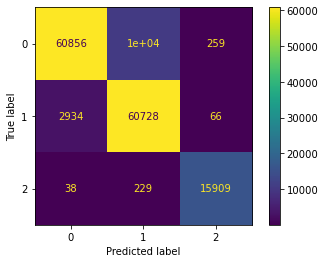

In [572]:
cm = confusion_matrix(predictions, rounded_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [573]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
# PPV = TP/(TP+FP)
# Negative predictive value
# NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
# FDR = FP/(TP+FP)


In [574]:
print(TPR, TNR, FPR, FNR)

[0.85176424 0.95292493 0.98349407] [0.96280537 0.87947228 0.99759571] [0.03719463 0.12052772 0.00240429] [0.14823576 0.04707507 0.01650593]


In [575]:
#total true positive which is just the accuracy 
TP.sum()/cm.sum()

0.9084380017310755

In [576]:
#total false positive rate which is just 1-accuracy
FP.sum()/cm.sum() 

0.09156199826892455